# Sentiment Analysis Project: Amazon Sales Data

# Project Overview
**Project Title**: Amazon Product Review Sentiment Analysis

**Objective**: Build a machine learning model to classify product reviews into sentiment categories (Positive, Negative, Neutral).

**Key Concepts**: Natural Language Processing (NLP), Text Preprocessing, Feature Extraction (TF-IDF), and Machine Learning Classification.

In [3]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score

In [4]:
#Dataset reading 
df = pd.read_csv('/Users/shraddhadebata/Desktop/PythonProject/Amazon_Sales_Dataset/amazon.csv')
df.head()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...


# Step1: Cleaning and PreProcessing

In [6]:
df.columns

Index(['product_id', 'product_name', 'category', 'discounted_price',
       'actual_price', 'discount_percentage', 'rating', 'rating_count',
       'about_product', 'user_id', 'user_name', 'review_id', 'review_title',
       'review_content', 'img_link', 'product_link'],
      dtype='object')

In [7]:
df.shape

(1465, 16)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   product_id           1465 non-null   object
 1   product_name         1465 non-null   object
 2   category             1465 non-null   object
 3   discounted_price     1465 non-null   object
 4   actual_price         1465 non-null   object
 5   discount_percentage  1465 non-null   object
 6   rating               1465 non-null   object
 7   rating_count         1463 non-null   object
 8   about_product        1465 non-null   object
 9   user_id              1465 non-null   object
 10  user_name            1465 non-null   object
 11  review_id            1465 non-null   object
 12  review_title         1465 non-null   object
 13  review_content       1465 non-null   object
 14  img_link             1465 non-null   object
 15  product_link         1465 non-null   object
dtypes: obj

**We expect the following columns to be numeric:**

discounted_price, actual_price, discount_percentage, rating, and rating_count.

Convert these columns to numeric types for analysis

In [10]:
df['discounted_price'] = df['discounted_price'].str.replace('₹','')
df['discounted_price'] = df['discounted_price'].str.replace(',','')

df['actual_price'] = df['actual_price'].str.replace('₹','')
df['actual_price'] = df['actual_price'].str.replace(',','')

df['discount_percentage'] = df['discount_percentage'].str.replace('%','')

df['rating_count'] = df['rating_count'].str.replace(',','')

In [11]:
print(df['discounted_price'])
print(df['actual_price'])
print(df['discount_percentage'])
print(df['rating_count'])

0        399
1        199
2        199
3        329
4        154
        ... 
1460     379
1461    2280
1462    2219
1463    1399
1464    2863
Name: discounted_price, Length: 1465, dtype: object
0       1099
1        349
2       1899
3        699
4        399
        ... 
1460     919
1461    3045
1462    3080
1463    1890
1464    3690
Name: actual_price, Length: 1465, dtype: object
0       64
1       43
2       90
3       53
4       61
        ..
1460    59
1461    25
1462    28
1463    26
1464    22
Name: discount_percentage, Length: 1465, dtype: object
0       24269
1       43994
2        7928
3       94363
4       16905
        ...  
1460     1090
1461     4118
1462      468
1463     8031
1464     6987
Name: rating_count, Length: 1465, dtype: object


In [12]:
df['rating'].value_counts()

rating
4.1    244
4.3    230
4.2    228
4.0    129
3.9    123
4.4    123
3.8     86
4.5     75
4       52
3.7     42
3.6     35
3.5     26
4.6     17
3.3     16
3.4     10
4.7      6
3.1      4
5.0      3
3.0      3
4.8      3
3.2      2
2.8      2
2.3      1
|        1
2        1
3        1
2.6      1
2.9      1
Name: count, dtype: int64

In [13]:
#Change "|" to a random number or drop it.
df['rating'] = df['rating'].str.replace('|','4.5')

In [14]:
#Change datatypes
df[['discounted_price','actual_price']] = df[['discounted_price','actual_price']].astype('float64')
df[['discount_percentage','rating', 'rating_count']] = df[['discount_percentage','rating', 'rating_count']].astype('float64')

In [15]:
#Change percentage value to point
df['discount_percentage'] = df['discount_percentage']/100
df['discount_percentage']

0       0.64
1       0.43
2       0.90
3       0.53
4       0.61
        ... 
1460    0.59
1461    0.25
1462    0.28
1463    0.26
1464    0.22
Name: discount_percentage, Length: 1465, dtype: float64

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   product_id           1465 non-null   object 
 1   product_name         1465 non-null   object 
 2   category             1465 non-null   object 
 3   discounted_price     1465 non-null   float64
 4   actual_price         1465 non-null   float64
 5   discount_percentage  1465 non-null   float64
 6   rating               1465 non-null   float64
 7   rating_count         1463 non-null   float64
 8   about_product        1465 non-null   object 
 9   user_id              1465 non-null   object 
 10  user_name            1465 non-null   object 
 11  review_id            1465 non-null   object 
 12  review_title         1465 non-null   object 
 13  review_content       1465 non-null   object 
 14  img_link             1465 non-null   object 
 15  product_link         1465 non-null   o

In [17]:
#Data Cleaning: Duplicate rows and null values
df.duplicated().sum()

0

In [18]:
df.isna().sum()

product_id             0
product_name           0
category               0
discounted_price       0
actual_price           0
discount_percentage    0
rating                 0
rating_count           2
about_product          0
user_id                0
user_name              0
review_id              0
review_title           0
review_content         0
img_link               0
product_link           0
dtype: int64

In [19]:
df = df.dropna()

In [20]:
df.describe()

,discounted_price,actual_price,discount_percentage,rating,rating_count
count,1463.000000,1463.000000,1463.000000,1463.000000,1463.000000
mean,3129.277122,5451.068544,0.476507,4.096992,18295.541353
std,6948.222850,10881.018448,0.216224,0.289590,42753.864952
min,39.000000,39.000000,0.000000,2.000000,2.000000
25%,325.000000,800.000000,0.320000,4.000000,1186.000000
50%,799.000000,1690.000000,0.500000,4.100000,5179.000000
75%,1999.000000,4312.500000,0.630000,4.300000,17336.500000
max,77990.000000,139900.000000,0.940000,5.000000,426973.000000


In [21]:
df.describe(include='O')

,product_id,product_name,category,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
count,1463,1463,1463,1463,1463,1463,1463,1463,1463,1463,1463
unique,1349,1335,211,1291,1192,1192,1192,1192,1210,1410,1463
top,B07JW9H4J1,"Fire-Boltt Ninja Call Pro Plus 1.83"" Smart Wat...",Computers&Accessories|Accessories&Peripherals|...,[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AHIKJUDTVJ4T6DV6IUGFYZ5LXMPA,AE55KTFVNXYFD5FPY...","$@|\|TO$|-|,Sethu madhav,Akash Thakur,Burger P...","R3F4T5TRYPTMIG,R3DQIEC603E7AY,R1O4Z15FD40PV5,R...","Worked on iPhone 7 and didn’t work on XR,Good ...","I am not big on camera usage, personally. I wa...",https://m.media-amazon.com/images/I/413sCRKobN...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
freq,3,5,231,6,10,10,10,10,8,3,1


In [22]:
#Check numeric columns
numeric_cols = df.select_dtypes(include=['number'])
numeric_cols

,discounted_price,actual_price,discount_percentage,rating,rating_count
0,399.0,1099.0,0.64,4.2,24269.0
1,199.0,349.0,0.43,4.0,43994.0
2,199.0,1899.0,0.90,3.9,7928.0
3,329.0,699.0,0.53,4.2,94363.0
4,154.0,399.0,0.61,4.2,16905.0
...,...,...,...,...,...
1460,379.0,919.0,0.59,4.0,1090.0
1461,2280.0,3045.0,0.25,4.1,4118.0
1462,2219.0,3080.0,0.28,3.6,468.0
1463,1399.0,1890.0,0.26,4.0,8031.0


In [23]:
# Combine the review title and content for a more comprehensive text
df['full_review'] = df['review_title'] + ' ' + df['review_content']

#Define a function for text cleaning
def clean_text(text):
    #Convert to lowercase
    text = text.lower()
    # Remove special characters, numbers, and punctuation
    text = re.sub(r'[^a-zA-Z\s]', '', text, re.I|re.A)
    #Remove extra spaces
    text = re.sub(r'\s+',' ',text).strip()
    return text

df['cleaned_text'] = df['full_review'].apply(clean_text)

In [24]:
import nltk
# Download the 'stopwords' and 'wordnet' datasets if you haven't already.
# You only need to run these two lines once.
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/shraddhadebata/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/shraddhadebata/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [25]:
df['cleaned_review'] = df['full_review'].apply(clean_text)
# Tokenization and Lemmatization
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))
def preprocess_text(text):
    tokens = text.split()
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    return ' '.join(tokens)

df['processed_review'] = df['cleaned_review'].apply(preprocess_text)


# Step 2: Feature Engineering and Model Training

In [27]:
# Create sentiment labels based on the rating
# 1-2.5: Negative, 3: Neutral, 3.5-5: Positive
def get_sentiment(rating):
    if rating >= 3.5:
        return 'Positive'
    elif rating <= 2.5:
        return 'Negative'
    else:
        return 'Neutral'

df['sentiment'] = df['rating'].apply(get_sentiment)
    

In [28]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    df['processed_review'],
    df['sentiment'],
    test_size = 0.2,
    random_state=42,
    stratify=df['sentiment']
)

In [30]:
# Convert text data to a numerical format using TF-IDF
vectorizer = TfidfVectorizer(max_features=5000)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

In [32]:
#Train a Naive Bayes Classifier
model = MultinomialNB()
model.fit(X_train_vec, y_train)

MultinomialNB()

# Step 3: Evaluation

In [36]:
#Make prediction on the test set
predictions = model.predict(X_test_vec)

In [38]:
#Print the evaluation metrics
print("\nModel Performance Report:")
print(f"Accuracy: {accuracy_score(y_test, predictions):.2f}")
print(classification_report(y_test, predictions))


Model Performance Report:
Accuracy: 0.97
              precision    recall  f1-score   support

     Neutral       0.00      0.00      0.00         8
    Positive       0.97      1.00      0.99       285

    accuracy                           0.97       293
   macro avg       0.49      0.50      0.49       293
weighted avg       0.95      0.97      0.96       293



/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# Step 4: Making Predictions on New Reviews

In [41]:
# Example of how to use the trained model
new_reviews = [
    "This product is amazing and works perfectly.",
    "The quality is very bad and it broke after a week.",
    "It's an average product, nothing special."
]


In [43]:
cleaned_new_reviews = [preprocess_text(clean_text(review)) for review in new_reviews]
new_reviews_vec = vectorizer.transform(cleaned_new_reviews)
new_predictions = model.predict(new_reviews_vec)

print("\nSentiment Predictions for New Reviews:")
for review, sentiment in zip(new_reviews, new_predictions):
    print(f"Review: '{review}' -> Sentiment: {sentiment}")


Sentiment Predictions for New Reviews:
Review: 'This product is amazing and works perfectly.' -> Sentiment: Positive
Review: 'The quality is very bad and it broke after a week.' -> Sentiment: Positive
Review: 'It's an average product, nothing special.' -> Sentiment: Positive


## Data Visualizations
**Visualizing the data is a crucial part of Exploratory Data Analysis (EDA). It helps you understand the dataset's characteristics and the patterns within the data before and after model training.**

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import plotly.express as px

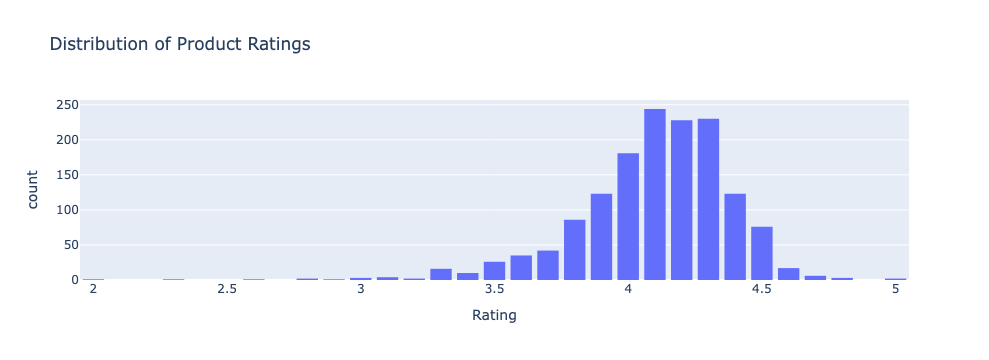

In [62]:
# Ensure the 'processed_review' and 'sentiment' columns are ready from the previous steps
# 1: Rating Distribution
fig_ratings = px.histogram(df, x='rating',
                           title='Distribution of Product Ratings',
                           labels = {'rating': 'Rating', 'count': 'Number of Reviews'},
                           color_discrete_sequence = px.colors.qualitative.Plotly)
fig_ratings.update_layout(bargap=0.2)
fig_ratings.show()

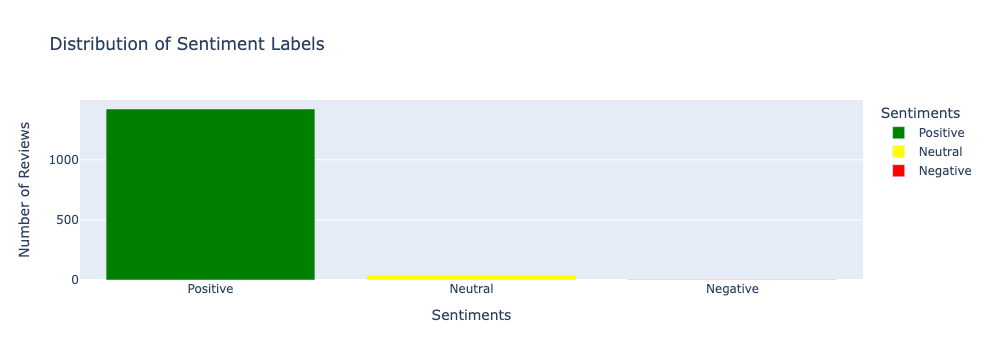

In [64]:
# 2: Sentiments Distribution
sentiment_counts = df['sentiment'].value_counts().reset_index()
sentiment_counts.columns = ['Sentiments','Count']
fig_sentiment = px.bar(sentiment_counts, x='Sentiments', y='Count',
                       title='Distribution of Sentiment Labels',
                       labels={'Count': 'Number of Reviews'},
                       color='Sentiments',
                       color_discrete_map={'Positive': 'green', 'Neutral': 'yellow', 'Negative': 'red'})
fig_sentiment.show()

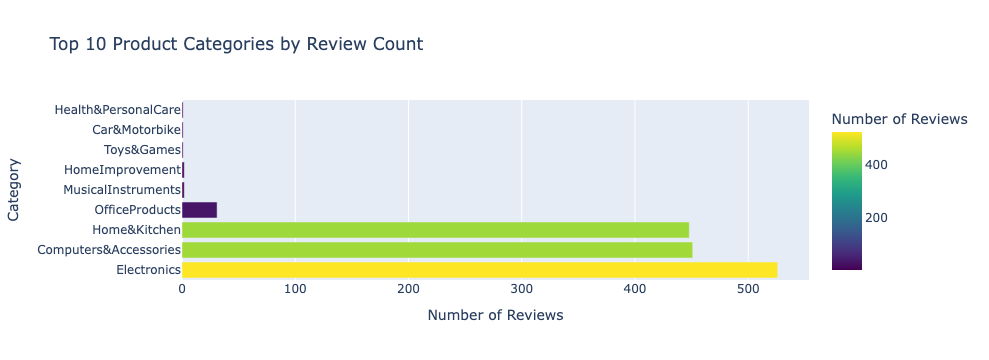

In [70]:
# 3: Top 10 Product Categories
df['main_category'] = df['category'].apply(lambda x: x.split('|')[0] if pd.notna(x) else x)
top_categories_df = df['main_category'].value_counts().nlargest(10).reset_index()
top_categories_df.columns = ['Category', 'Number of Reviews']
fig_categories = px.bar(top_categories_df, x='Number of Reviews', y='Category',
                        orientation='h',
                        title='Top 10 Product Categories by Review Count',
                        color='Number of Reviews',
                        color_continuous_scale=px.colors.sequential.Viridis)
fig_categories.show()

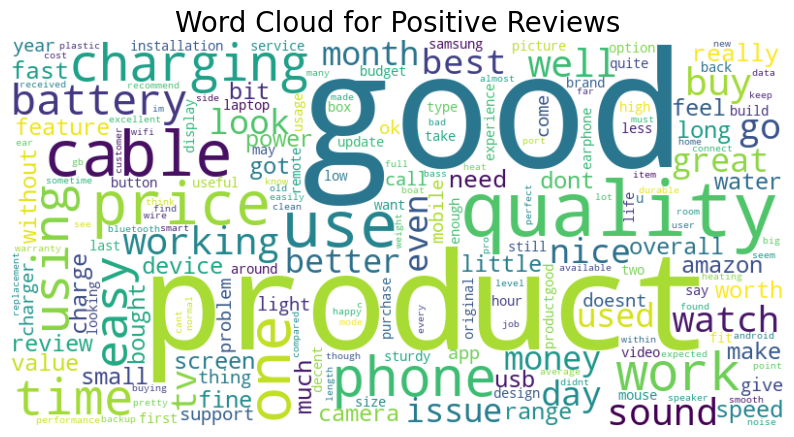

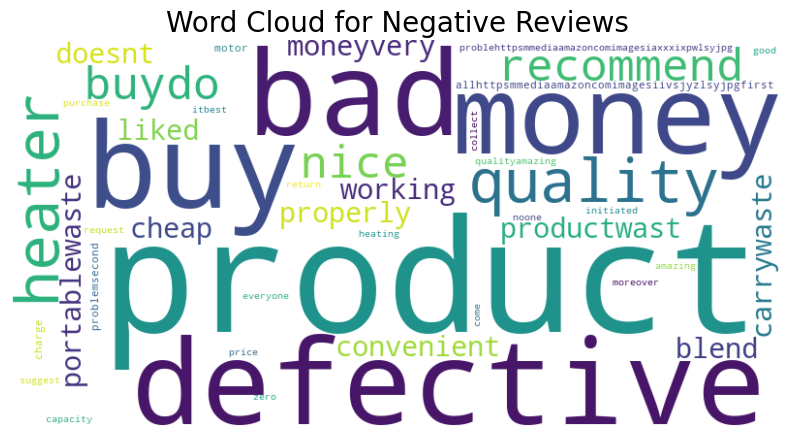

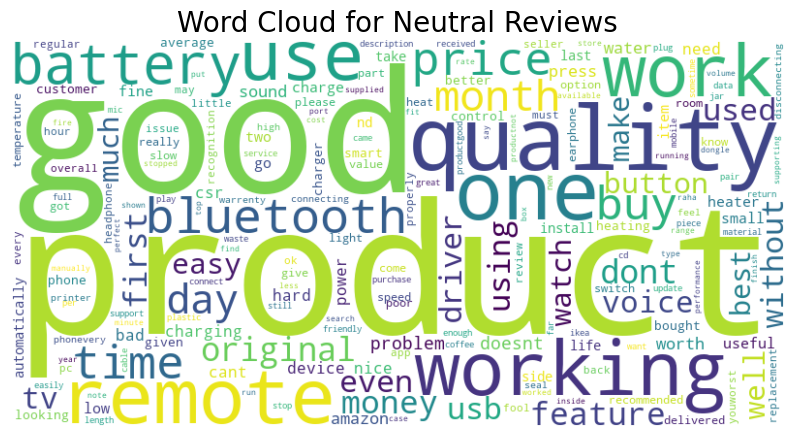

In [76]:
# Word Cloud Visualizations 
def generate_word_cloud(sentiment_df, sentiment_label):
    text = " ".join(review for review in sentiment_df['processed_review'])
    wordcloud = WordCloud(
        width = 800,
        height = 400,
        background_color='white',
        collocations=False
    ).generate(text)
    plt.figure(figsize=(10, 7))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud for {sentiment_label} Reviews', fontsize=20)
    plt.axis('off')
    plt.show()

# Generate word clouds for each sentiment
generate_word_cloud(df[df['sentiment'] == 'Positive'], 'Positive')
generate_word_cloud(df[df['sentiment'] == 'Negative'], 'Negative')
generate_word_cloud(df[df['sentiment'] == 'Neutral'], 'Neutral')